In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from tslearn.utils import to_time_series


In [2]:
pickel_dir_path = "YOUR_PATH\\data\\pickels_v2"

means_data = pd.read_pickle(f"{pickel_dir_path}\\aggregated_car_data_2016_from_day_32_3_weeks_means.pkl")

In [20]:
means_dir1 = means_data[["lamIds",	"day_indices",	"mean_dir_1"]]
means_dir1.loc[:, "direction"] = 1
means_dir1 = means_dir1.rename(columns={"mean_dir_1": "mean"})

means_dir2 = means_data[["lamIds",	"day_indices",	"mean_dir_2"]]
means_dir2.loc[:, "direction"] = 2
means_dir2 = means_dir2.rename(columns={"mean_dir_2": "mean"})


C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [21]:
means = pd.concat([means_dir1, means_dir2])

In [22]:
means

,lamIds,day_indices,mean,direction
lamId,,,,
1,1,32,"[4.666666666666667, 9.333333333333334, 6.33333...",1
99,99,32,"[9.666666666666666, 7.666666666666667, 9.66666...",1
102,102,32,"[5.666666666666667, 6.0, 9.0, 7.33333333333333...",1
103,103,32,"[7.666666666666667, 5.333333333333333, 12.0, 1...",1
104,104,32,"[9.666666666666666, 8.666666666666666, 6.33333...",1
...,...,...,...,...
1603,1603,32,"[3.3333333333333335, 2.0, 0.6666666666666666, ...",2
1604,1604,32,"[5.333333333333333, 3.0, 1.3333333333333333, 0...",2
1605,1605,32,"[2.3333333333333335, 4.333333333333333, 3.6666...",2


In [69]:
transformed_data = to_time_series_dataset(means["mean"].to_numpy())
scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(transformed_data)

In [92]:
ks = TimeSeriesKMeans(2)
ks.fit(scaled)
preds = ks.predict(scaled)

In [93]:
preds_count = preds.shape[0]
middle = int(preds_count / 2)
first = preds[:middle]
second = preds[middle:]


In [94]:
diff = first - second
correct = len(diff[diff != 0])
print(f"Labeled directions correctly for {correct} of {middle} points")
print(f"Accuracy {correct/middle}")

Labeled directions correctly for 304 of 392 points
Accuracy 0.7755102040816326


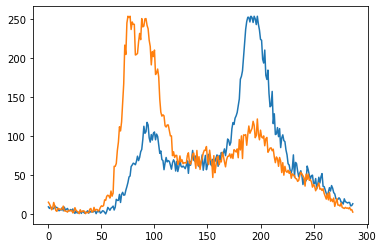

In [103]:
i = 1
plt.plot(means.iloc[i]["mean"])
plt.plot(means.iloc[middle+i]["mean"])

In [121]:
cant_distinguish = np.where(diff==0)
can_distinguish = np.where(diff!=0)


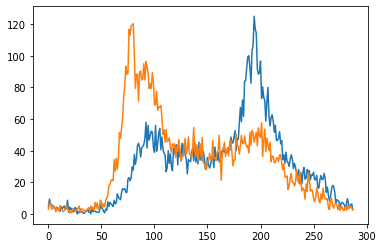

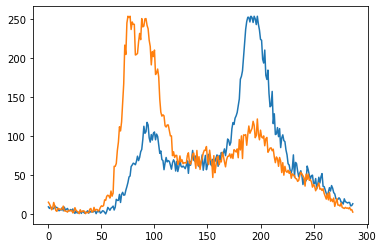

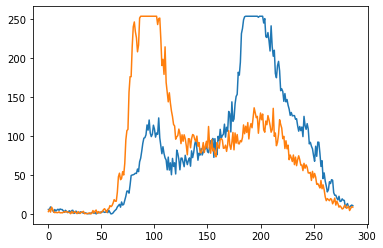

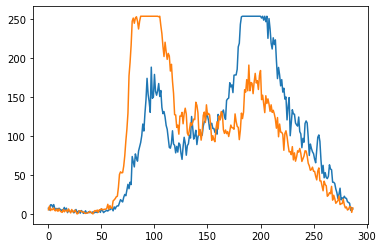

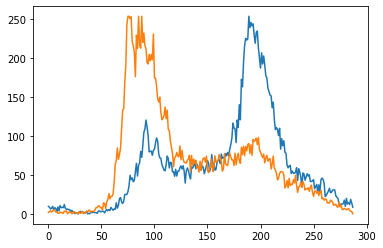

In [123]:
for ith_index in range(0, 5):
  i = can_distinguish[0][ith_index]
  plt.plot(means.iloc[i]["mean"])
  plt.plot(means.iloc[middle+i]["mean"])
  plt.show()

In [125]:
mean_with_pred = means.copy()
mean_with_pred["direction_prediction"] = pd.Series(preds, index=mean_with_pred.index)

In [141]:
grouped_means = mean_with_pred.groupby(["lamId", "direction_prediction"])

In [144]:
grouped_means.count()

lamIds  day_indices  mean  direction
lamId direction_prediction                                      
1     0                          1            1     1          1
      1                          1            1     1          1
99    0                          1            1     1          1
      1                          1            1     1          1
102   0                          1            1     1          1
...                            ...          ...   ...        ...
1605  1                          1            1     1          1
1606  0                          1            1     1          1
      1                          1            1     1          1
1607  0                          1            1     1          1
      1                          1            1     1          1

[696 rows x 4 columns]

In [145]:
means

,lamIds,day_indices,mean,direction
lamId,,,,
1,1,32,"[4.666666666666667, 9.333333333333334, 6.33333...",1
99,99,32,"[9.666666666666666, 7.666666666666667, 9.66666...",1
102,102,32,"[5.666666666666667, 6.0, 9.0, 7.33333333333333...",1
103,103,32,"[7.666666666666667, 5.333333333333333, 12.0, 1...",1
104,104,32,"[9.666666666666666, 8.666666666666666, 6.33333...",1
...,...,...,...,...
1603,1603,32,"[3.3333333333333335, 2.0, 0.6666666666666666, ...",2
1604,1604,32,"[5.333333333333333, 3.0, 1.3333333333333333, 0...",2
1605,1605,32,"[2.3333333333333335, 4.333333333333333, 3.6666...",2


In [171]:
direction_1 = mean_with_pred.sort_values(["lamIds", "direction_prediction"]).iloc[::2,]
direction_2 = mean_with_pred.sort_values(["lamIds", "direction_prediction"]).iloc[1::2,]
directions_mean = means_data.sort_values(["lamIds"])["mean_both_directions"]

In [180]:
final_df = pd.DataFrame({
  "lamId": direction_1["lamIds"],
  "mean": directions_mean,
  "direction1": direction_1["mean"],
  "direction2": direction_2["mean"]
})

In [184]:
clustering_data = final_df[["mean", "direction1", "direction2"]].to_numpy()

In [205]:
#to_time_series(clustering_data[0][0])

one = clustering_data[0]

In [213]:
np.array(one[0]).shape

(288,)

In [216]:
np.ravel(one).shape

(3,)

In [223]:
asd = []

for row in range(clustering_data.shape[0]):
  asd.append([clustering_data[row][0], clustering_data[row][1], clustering_data[row][2]])

In [225]:
numpified = np.array(asd)

In [226]:
numpified.shape

(392, 3, 288)

In [227]:
asd_dataset = to_time_series_dataset(numpified)

In [230]:
asd_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(asd_dataset)

In [231]:
ks = TimeSeriesKMeans(3)
ks.fit(asd_scaled)
preds = ks.predict(asd_scaled)

In [232]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0,

In [236]:
print(list(final_df["lamId"]))

[1, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 162, 163, 164, 165, 167, 168, 169, 175, 176, 177, 178, 179, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 221, 223, 224, 225, 226, 227, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 242, 243, 244, 245, 247, 248, 249, 251, 252, 254, 255, 257, 302, 303, 304, 305, 306, 401, 402, 403, 404, 405, 406, 407, 408, 409, 421, 422, 424, 425, 426, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 445, 446, 447, 448, 449, 450, 451, 453, 455, 456, 457, 458, 460, 461, 462, 463, 464, 465, 466, 501, 503, 521, 522, 524, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 547, 550, 556, 558, 559, 560, 561, 562, 563, 564, 572, 573, 57

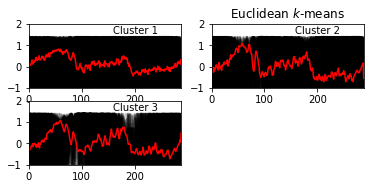

In [243]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 2, yi + 1)
    for xx in asd_scaled[preds == yi]:
        plt.plot(xx[0].ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, asd_scaled[0].shape[1])
    plt.ylim(-1, 2)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [244]:
ks_3 = KShape(3)
ks_3.fit(asd_scaled)
preds_3 = ks_3.predict(asd_scaled)

In [245]:
preds_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,

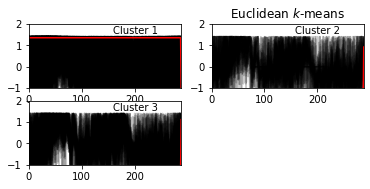

In [251]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 2, yi + 1)
    for xx in asd_scaled[preds_3 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks_3.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 288)
    plt.ylim(-1, 2)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [258]:
ks_3.cluster_centers_

array([[[ 1.35997827,  1.35997827,  1.35997827, ...,  1.35997827,
          1.35997827,  1.35997827],
        [-1.01591222, -1.01591222, -1.01591222, ..., -1.01591222,
         -1.01591222, -1.01591222],
        [-0.34406605, -0.34406605, -0.34406605, ..., -0.34406605,
         -0.34406605, -0.34406605]],

       [[-1.387171  , -1.387171  , -1.387171  , ..., -1.387171  ,
         -1.387171  , -1.387171  ],
        [ 0.93194964,  0.93194964,  0.93194964, ...,  0.93194964,
          0.93194964,  0.93194964],
        [ 0.45522136,  0.45522136,  0.45522136, ...,  0.45522136,
          0.45522136,  0.45522136]],

       [[-1.30049333, -1.30049333, -1.30049333, ..., -1.30049333,
         -1.30049333, -1.30049333],
        [ 1.13143044,  1.13143044,  1.13143044, ...,  1.13143044,
          1.13143044,  1.13143044],
        [ 0.1690629 ,  0.1690629 ,  0.1690629 , ...,  0.1690629 ,
          0.1690629 ,  0.1690629 ]]])